In [1]:
import math
from collections import Counter


def entropy(data):
    labels = [item["label"] for item in data]
    counts = Counter(labels)
    return -sum(p / len(labels) * math.log2(p / len(labels)) for p in counts.values())


def info_gain(data, attribute):
    values = set([item[attribute] for item in data])
    rem = 0
    for value in values:
        subset = [item for item in data if item[attribute] == value]
        rem += len(subset) / len(data) * entropy(subset)
    return entropy(data) - rem


def build_tree(data, features, target_attribute):
    labels = [item[target_attribute] for item in data]
    if len(set(labels) == 1):
        return labels[0]
    if not features:
        return Counter(labels[labels].most_common(1)[0][0])
    best_attribute = max(features, key=lambda attribute: info_gain(data, attribute))
    tree = {best_attribute: {}}
    remaining_features = [f for f in features if f != best_attribute]

    for value in set([item[best_attribute] for item in data]):
        subset = [item for item in data if item[best_attribute] == value]
        subtree = build_tree(subset, remaining_features, target_attribute)
        tree[best_attribute][value] = subtree

    return tree

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



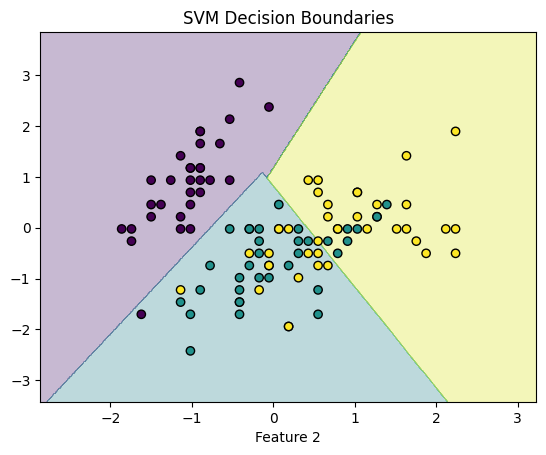

In [ ]:
def plot_decision_boundaries(x, y, model):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", marker="o")
    plt.xlabel("Feature 1")
    plt.xlabel("Feature 2")
    plt.title("SVM Decision Boundaries")
    plt.show()


plot_decision_boundaries(X_train, y_train, clf)